## Real Estate Cost Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("delhi_2023.csv")

NameError: name 'pd' is not defined

In [3]:
housing.head()

,location,area,bhk,price
0,Karampura,3200,4,144600000
1,Vasant Kunj,1200,3,7000000
2,Karampura,1219,3,48500000
3,Vasant Kunj,800,2,5000000
4,Karampura,2400,3,99600000


In [4]:
housing.shape

(4380, 4)

In [5]:
housing["location"].value_counts()

Sector 6 Dwarka         425
Sector 10 Dwarka        358
Sector 12 Dwarka        293
Sector 4 Dwarka         284
Sector 19 Dwarka        270
                       ... 
Hari Nagar                1
Bakkarwala                1
Sector-D Vasant Kunj      1
Neb Sarai                 1
Inderlok                  1
Name: location, Length: 115, dtype: int64

In [6]:
housing["bhk"].value_counts()

3    2412
4    1071
2     734
1     130
5      30
6       3
Name: bhk, dtype: int64

In [7]:
housing["price"].value_counts()

16500000    144
17500000    107
21000000    105
16000000    103
18000000     96
           ... 
80000000      1
4899000       1
41000000      1
3050000       1
37000000      1
Name: price, Length: 465, dtype: int64

In [8]:
housing["area"].value_counts()

1700    532
1800    330
2400    324
1750    284
2000    240
       ... 
3650      1
2670      1
1395      1
3350      1
3460      1
Name: area, Length: 280, dtype: int64

In [9]:
(housing["area"]/housing["bhk"]).describe()

count    4380.000000
mean      536.985902
std       140.433295
min       200.000000
25%       497.500000
50%       566.666667
75%       600.000000
max      1333.333333
dtype: float64

In [10]:
(housing["price"]/housing["area"]).describe()

count     4380.000000
mean      9633.350531
std       3741.897518
min       2056.074766
25%       8333.333333
50%       9722.222222
75%      10857.142857
max      72966.833258
dtype: float64

In [11]:
housing.isna().sum()

location    0
area        0
bhk         0
price       0
dtype: int64

In [12]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   location  4380 non-null   object
 1   area      4380 non-null   int64 
 2   bhk       4380 non-null   int64 
 3   price     4380 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 137.0+ KB


In [13]:
housing.describe()

,area,bhk,price
count,4380.000000,4380.000000,4.380000e+03
mean,1660.963242,3.033333,1.703136e+07
std,644.599231,0.750600,1.052475e+07
min,360.000000,1.000000,9.750000e+05
25%,1250.000000,3.000000,1.290000e+07
50%,1700.000000,3.000000,1.740000e+07
75%,2000.000000,4.000000,2.160000e+07
max,4950.000000,6.000000,2.200000e+08


## Plotting the data

In [14]:
%matplotlib inline

array([[<AxesSubplot: xlabel='area', ylabel='area'>,
        <AxesSubplot: xlabel='bhk', ylabel='area'>,
        <AxesSubplot: xlabel='price', ylabel='area'>],
       [<AxesSubplot: xlabel='area', ylabel='bhk'>,
        <AxesSubplot: xlabel='bhk', ylabel='bhk'>,
        <AxesSubplot: xlabel='price', ylabel='bhk'>],
       [<AxesSubplot: xlabel='area', ylabel='price'>,
        <AxesSubplot: xlabel='bhk', ylabel='price'>,
        <AxesSubplot: xlabel='price', ylabel='price'>]], dtype=object)

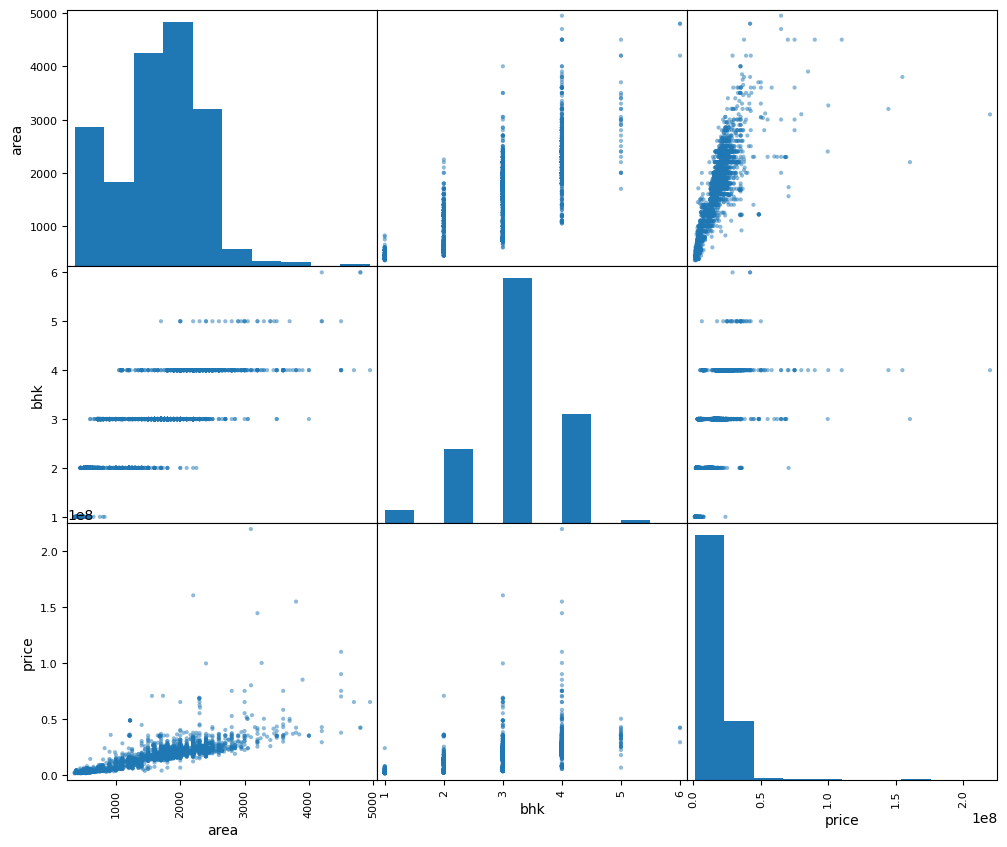

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing, figsize=(12,10))

In [16]:
X = housing.drop(columns=['price'])
y = housing['price']

In [17]:
X.shape

(4380, 3)

In [18]:
y.shape

(4380,)

## Splitting Train-Test Data

In [19]:
# train_set, test_set = split_train_test(housing, 0.2)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [21]:
print(f"No. of values in:\nX_train: {len(X_train)} , X_test {len(X_test)}\ny_train: {len(y_train)} , y_test {len(y_test)}")

No. of values in:
X_train: 3504 , X_test 876
y_train: 3504 , y_test 876


In [22]:
print(X_train.shape)
print(X_test.shape)

(3504, 3)
(876, 3)


## Applying Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [24]:
column_transform = make_column_transformer((OneHotEncoder(sparse=False, handle_unknown = 'ignore'),['location']),
                                          remainder="passthrough")

In [25]:
scaler = StandardScaler(with_mean=False)

In [26]:
lr = LinearRegression()

In [27]:
pipe = make_pipeline(column_transform, scaler ,lr)

In [28]:
pipe.fit(X_train, y_train)

C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('linearregression', LinearRegression())])

In [29]:
y_pred_lr = pipe.predict(X_test)
r2_score(y_test, y_pred_lr)

-3.368642096220791e+21

## Applying Lasso Model

In [30]:
lasso = Lasso()

In [31]:
pipe = make_pipeline(column_transform, scaler ,lasso)

In [32]:
pipe.fit(X_train, y_train)

C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.814e+15, tolerance: 3.447e+13
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('lasso', Lasso())])

In [33]:
y_pred_lasso = pipe.predict(X_test)
r2_score(y_test, y_pred_lasso)

0.8535004528391619

## Applying Ridge Model

In [34]:
ridge = Ridge()

In [35]:
pipe = make_pipeline(column_transform, scaler ,ridge)

In [36]:
pipe.fit(X_train, y_train)

C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('ridge', Ridge())])

In [37]:
y_pred_ridge = pipe.predict(X_test)
r2_score(y_test, y_pred_ridge)

0.8533432120551441

## Applying Decision Tree Regressor

In [38]:
dtr = DecisionTreeRegressor()

In [39]:
pipe = make_pipeline(column_transform, scaler ,dtr)

In [40]:
pipe.fit(X_train, y_train)

C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [41]:
y_pred_dtr = pipe.predict(X_test)
r2_score(y_test, y_pred_dtr)

0.8740874388994208

## Applying Random Forest Regressor

In [42]:
rfr = RandomForestRegressor()

In [43]:
pipe = make_pipeline(column_transform, scaler ,rfr)

In [44]:
pipe.fit(X_train, y_train)

C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('randomforestregressor', RandomForestRegressor())])

In [45]:
y_pred_rfr = pipe.predict(X_test)
r2_score(y_test, y_pred_rfr)

0.7115167009146651

## Applying XGBRegressor

In [46]:
xgb = XGBRegressor()

In [47]:
pipe = make_pipeline(column_transform, scaler ,xgb)

In [48]:
pipe.fit(X_train, y_train)

C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              co...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [49]:
y_pred_xgb = pipe.predict(X_test)
r2_score(y_test, y_pred_xgb)

0.8153472412240856

## Result

In [50]:
print("Linear Regression: ",r2_score(y_test,y_pred_lr))
print("Lasso: ",r2_score(y_test,y_pred_lasso))
print("Ridge: ",r2_score(y_test,y_pred_ridge))
print("Random Forest Regressor: ",r2_score(y_test,y_pred_rfr))
print("Decision Tree Regressor: ",r2_score(y_test,y_pred_dtr))
print("XGBRegressor: ",r2_score(y_test,y_pred_xgb))

Linear Regression:  -3.368642096220791e+21
Lasso:  0.8535004528391619
Ridge:  0.8533432120551441
Random Forest Regressor:  0.7115167009146651
Decision Tree Regressor:  0.8740874388994208
XGBRegressor:  0.8153472412240856


In [51]:
# pipe.predict(pd.DataFrame([["Ambernath West",1000,1]],columns=["location","area","bhk"]))

In [52]:
import pickle

In [53]:
pickle.dump(pipe, open("XGB_Delhi.pkl","wb"))